In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
#init
country = 'Uganda'

age_data_path = 'Data/age_data.xls'
both_sheet = 'both; 1950-2005, estimates'
female_sheet = 'f; 1950-2005, estimates'
male_sheet = 'm; 1950-2005, estimates'
both_sheet_medfert = 'both; 2010-50, medium-fertility'
female_sheet_medfert = 'f; 2010-50, medium-fertility'
male_sheet_medfert = 'm; 2010-50, medium-fertility'

unnesessary_rows = range(0,5)
# right names for columns in data sheet
columns_names = {'Reference date (as of 1 July)':'year','Total population by five-year age groups (thousands)': '0 - 4', 'Unnamed: 7': '5 - 9', 'Unnamed: 8': '10 - 14', 'Unnamed: 9': '15 - 19', 'Unnamed: 10': '20 - 24', 'Unnamed: 11': '25 - 29', 'Unnamed: 12': '30 - 34', 'Unnamed: 13': '35 - 39', 'Unnamed: 14': '40 - 44', 'Unnamed: 15': '45 - 49', 'Unnamed: 16': '50 - 54', 'Unnamed: 17': '55 - 59', 'Unnamed: 18': '60 - 64', 'Unnamed: 19': '65 - 69', 'Unnamed: 20': '70 - 74', 'Unnamed: 21': '75 - 79', 'Unnamed: 22': '80 - 84', 'Unnamed: 23': '85 - 89', 'Unnamed: 24': '90 - 94', 'Unnamed: 25': '95 - 99', 'Unnamed: 26': '100+', 'Female population by five-year age groups (thousands)': '0 - 4', 'Male population by five-year age groups (thousands)': '0 - 4'}
# names of unnesessary columns
skipped_columns = {'index', 'Index', 'Variant','Major area, region, country or area*', 'Notes', 'Country code'}



In [4]:
def extract_data(sheet):
    data = pd.read_excel(age_data_path, sheet_name=sheet, skiprows = unnesessary_rows)
    data = data[data['Major area, region, country or area*'] == country]
    data = data.rename(columns=columns_names)
    data = data.reset_index().drop(columns = skipped_columns, axis = 1)
    data.replace('-', np.nan, inplace = True)
    data = data.astype(np.float64)
    data = data.astype({'year': np.int64})
    data = data.set_index('year')
    return data

Get needed estimate data for males and females:

In [5]:
#get needed data
data_both = extract_data(both_sheet)
data_female = extract_data(female_sheet)
data_male = extract_data(male_sheet)

Demographic profile: 

Text(0.5, 1.0, 'Demographic profile for 2005 year')

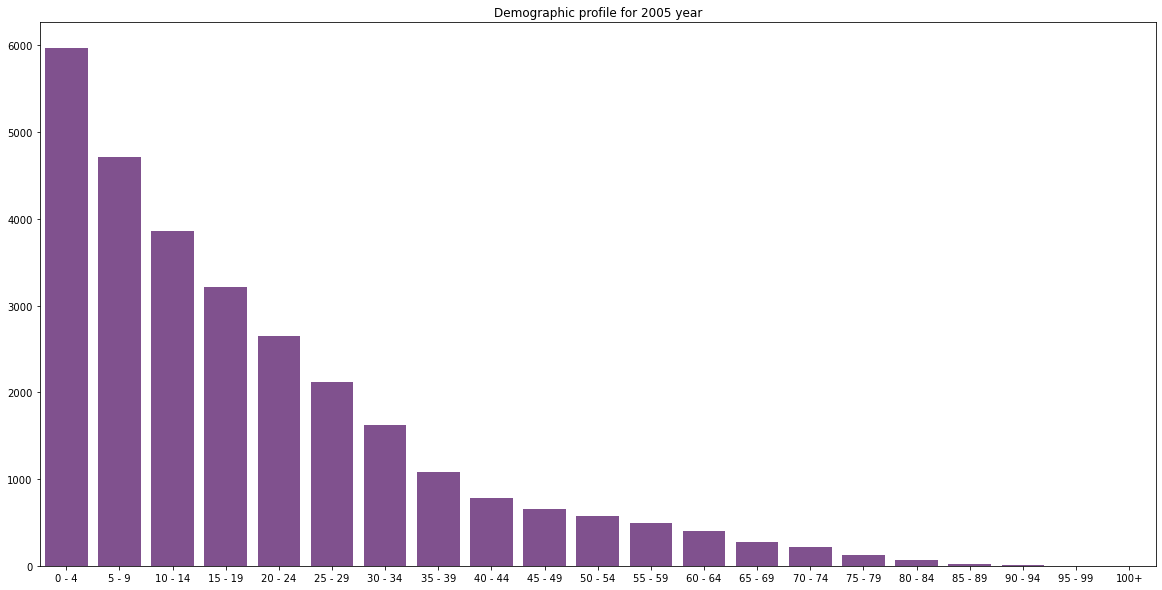

In [6]:
year = 2005
year_data = data_both.loc[year]
plt.figure(figsize=(20,10))
sns.barplot(year_data.index, year_data.values, color='#854798')
plt.title(f'Demographic profile for {year} year')

1. Determine "survival" rate:

In [7]:
def find_survival_rate(this_year, data):
    no_data = ['85 - 89', '90 - 94', '95 - 99', '100+']
    if this_year <= 1995:
        popul_this_year = data.drop(no_data, axis = 1).loc[this_year]
        popul_past_year = data.drop(no_data, axis = 1).loc[this_year-5]
    else:
        popul_this_year = data.loc[this_year]
        popul_past_year = data.loc[this_year-5]
    survival_rate_raw = {}
    for i in range(0,len(popul_past_year)-1):
        survival_rate_raw[popul_this_year.index[i+1]] = popul_this_year[i+1] / popul_past_year[i]
    
    survival_rate = pd.Series(survival_rate_raw)
    return survival_rate

this_year = 2005
survival_rate_male = find_survival_rate(this_year, data_male)
survival_rate_female = find_survival_rate(this_year, data_female)
survival_rate_both = find_survival_rate(this_year, data_both)


Text(0.5, 1.0, 'Male "survival" rate 2000 - 2005')

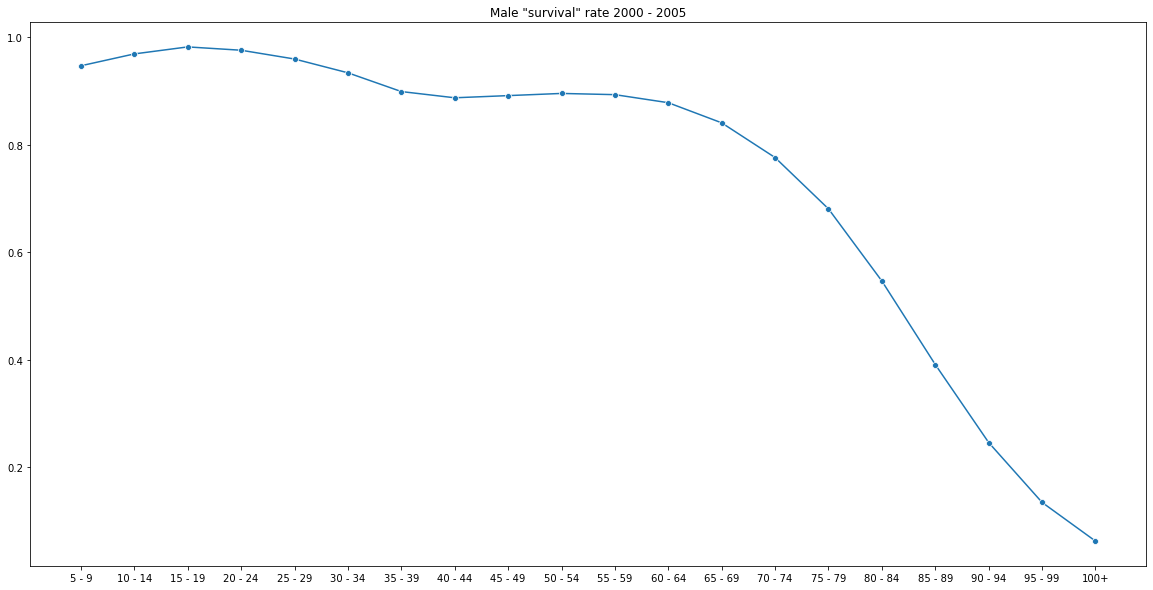

In [8]:
plt.figure(figsize=(20,10))
sns.lineplot(survival_rate_male.index, survival_rate_male.values, marker='o')
plt.title(f'Male "survival" rate {this_year-5} - {this_year}')

Text(0.5, 1.0, 'Female "survival" rate 2000 - 2005')

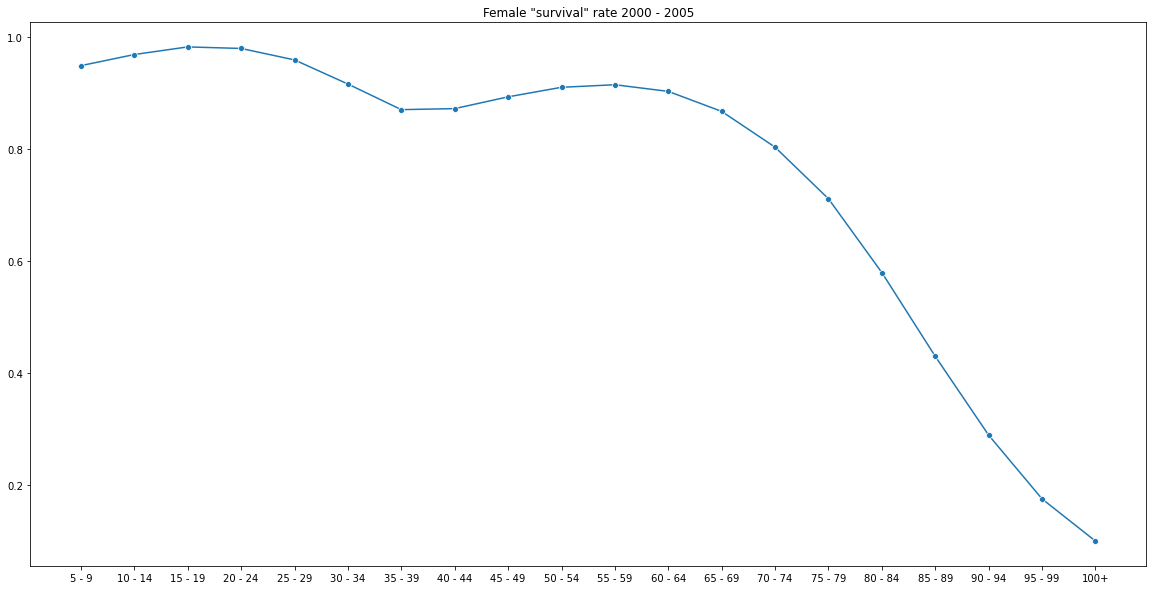

In [9]:
plt.figure(figsize=(20,10))
sns.lineplot(survival_rate_female.index, survival_rate_female.values, marker='o')
plt.title(f'Female "survival" rate {this_year-5} - {this_year}')

2. Determine fertility rate for women in age 20-39 

In [10]:
fertility_year = 2005

fertile_women = data_female[['20 - 24', '25 - 29', '30 - 34', '35 - 39']]
fertile_women = fertile_women.loc[fertility_year].sum()
children = data_both[['0 - 4']].loc[fertility_year][0]
# children / women = fertility rate
fertility_rate = ((children / fertile_women))
print("fertile women in 5 years:", fertile_women)
print("number of children in 5 years:", children)
print("fertility rate in 5 years:", fertility_rate)

fertile women in 5 years: 3705.085
number of children in 5 years: 5970.05
fertility rate in 5 years: 1.6113125609803824


3. Newborn boys and girls ratio

In [11]:
newborn_girls = data_female[['0 - 4']].loc[fertility_year][0]
newborn_boys = data_male[['0 - 4']].loc[fertility_year][0]
newborn_bg_ratio = newborn_boys / newborn_girls
print('boys and girls ratio', newborn_bg_ratio)

boys and girls ratio 1.0178338515326115


4. Convert coefficients to 1-year step

In [12]:
 fertility_rate = fertility_rate / 5
 print('fertility rate for 1 year', fertility_rate)
 survival_rate_both = survival_rate_both ** 0.2
 survival_rate_female = survival_rate_female ** 0.2
 survival_rate_male = survival_rate_male ** 0.2

fertility rate for 1 year 0.3222625121960765


5. Predict the change in the population and demographic profile for 100 years


In [13]:
prediction_both = pd.DataFrame()


""


6. Compare with existing prediction

In [14]:
both_data_medfert = extract_data(both_sheet_medfert)
male_data_medfert = extract_data(male_sheet_medfert)
female_data_medfert = extract_data(female_sheet_medfert) 